In [1]:
#!pip install arabicstemmer
#!pip install farasa
#!pip install arabic_reshaper 
#!pip install buckwalter
#!pip install lang-trans
#!pip install pybuckwalter
#!pip install pyarabic

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import arabicstemmer
#from camel_tools.utils.normalize import normalize
from arabic_reshaper import reshape
import farasa
#from farasa.normalization import FarasaNormalizer

import pyarabic.araby as araby

nltk.download('stopwords')

from nltk.corpus import stopwords
arabic_stopwords = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yazan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("5000translated_data_unbalanced.csv", encoding='utf-8')

In [4]:
df.iloc[100:120,:]

,sms,label,sms_arabic
100,pleas dont text anymor noth els say,0,مناشدات لا يقول أي شيء آخر
101,okay name ur price long legal wen pick u ave x...,0,اسم حسنًا ، اسمك ، سعرك القانوني الطويل ، اختي...
102,im still look car buy gone 4the drive test yet,0,ما زلت أبدو شراء سيارة ذهب 4 اختبار القيادة حت...
103,per request mell mell oru minnaminungint nurun...,0,لكل طلب mell mell oru minnaminungint nurungu v...
104,wow your right didnt mean guess gave boston me...,0,نجاح باهر حقك لم يعني التخمين أعطى بوسطن مين ت...
105,umma life vava umma love lot dear,0,umma life vava umma love lot dear
106,thank lot wish birthday thank make birthday tr...,0,شكرا جزيلا أتمنى عيد ميلاد شكرا جعل مذكرات عيد...
107,aight ill hit get cash,0,ضرب سيئا الحصول على النقود
108,would ip address test consid comput isnt minec...,0,هل اختبار عنوان IP يعتبر جهاز كمبيوتر ليس خادم...
109,know grumpi old peopl mom like better lie alwa...,0,تعرف أمي غرومبي العجوز مثل أفضل الكذب دائما نك...


In [5]:
df['sms'] = df['sms_arabic']

In [6]:
df = df.drop(columns='sms_arabic', axis  = 1)

In [7]:
df.head()

,sms,label
0,الذهاب جورونج نقطة مجنون الاستفادة بوجي ن العا...,0
1,طيب نكتة لار wif u oni,0
2,دخول مجاني 2 wkli comp win كأس الاتحاد النهائي...,1
3,ش دون أن أقول في وقت مبكر هور uc alreadi,0
4,ناه لا أعتقد أن جو أوسف العيش حول رغم ذلك,0


In [8]:
df.shape

(5574, 2)

In [9]:
def check(df):
    """
    This function takes a DataFrame as input and returns a DataFrame containing information about the columns of the DataFrame.
    """
    l=[]
    # Get the column names of the input DataFrame
    columns=df.columns
    
    # Iterate through each column
    for col in columns:
        # Get the data type of the current column
        dtypes=df[col].dtypes
        # Get the number of unique values in the current column
        nunique=df[col].nunique()
        # Get the number of missing values in the current column
        sum_null=df[col].isnull().sum()
        # Get the proportion of missing values in the current column
        sum_mean = df[col].isnull().mean()
        l.append([col,dtypes,nunique,sum_null,sum_mean])
    # Create a DataFrame from the list of column information
    df_check=pd.DataFrame(l)
    # Set the column names of the new DataFrame
    df_check.columns=['column','dtypes','nunique','sum_null','sum_mean']
    # Return the new DataFrame
    return df_check

In [10]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,sms,object,5113,5,0.000897
1,label,int64,2,0,0.000000


In [11]:
df.duplicated().sum()

460

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(5114, 2)

In [14]:
df.tail(10)

,sms,label
5564,طيب لور سوني إريكسون بائع يسأل shuhui ويقول إن...,0
5565,أحرق 6 إعجابات ممنوحة لهم,0
5566,لا تنتظر حتى أقل من الأربعاء انظر الحصول على,0
5567,هاه لي,0
5568,تذكير o2 احصل على 250 جنيهًا من تفاصيل رصيد مك...,1
5569,مرة ثانية ثلاثية 2 اتصل UU 750 جنيه جائزة 2 مط...,1
5570,ü b اذهب إلى المتنزه fr إلى المنزل,0
5571,يقترح piti mood soani,0
5572,الرجل الكلبة يتصرف مثل معرف الفائدة شراء Somet...,0
5573,rofl الاسم الحقيقي,0


In [15]:
df.dropna(inplace = True)

In [16]:
# Check for missing values and remove or fill them
null_counts = df.isnull().sum()
if null_counts.any():
    # If there are any null values, remove the rows or columns that contain them
    df.dropna(inplace=True)
    # Alternatively, fill the null values with the column mean
    # df.fillna(df.mean(), inplace=True)

# Tokenize the words and remove stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('arabic'))
df['sms'] = df['sms'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Stem the words to remove common affixes
stemmer = SnowballStemmer('arabic')
df['sms'] = df['sms'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yazan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yazan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
df

,sms,label
0,ذهاب جورونج نقط مجنو استفاد بوج عالم عظيم بوف ...,0
1,طيب نكت لار wif u oni,0
2,دخول مجا 2 wkli comp win كاس اتحاد نهاء tkts 2...,1
3,اقول وقت مبكر هور uc alreadi,0
4,ناه اعتقد جو اوسف عيش حول رغم,0
...,...,...
5569,مر ثان ثلاث 2 اتصل UU 750 جايز 2 مطالب Easy Ca...,1
5570,ü b اذهب متنزه fr منزل,0
5571,يقترح piti mood soani,0
5572,رجل كلب يتصرف معرف فايد شراء Someth els اسبوع ...,0


In [18]:
def normalize_arabic_text(text):
    # normalize hamza and alef
    text = araby.strip_tashkeel(text) #حذف الحركات كلها بما فيها الشدة
    text = araby.normalize_hamza(text) # تنميط أشكال الهمزة المختلفة
    return text

In [19]:
df['sms'] = df['sms'].apply(normalize_arabic_text)

In [20]:
df

,sms,label
0,ذهاب جورونج نقط مجنو استفاد بوج عالم عظيم بوف ...,0
1,طيب نكت لار wif u oni,0
2,دخول مجا 2 wkli comp win كاس اتحاد نهاء tkts 2...,1
3,اقول وقت مبكر هور uc alreadi,0
4,ناه اعتقد جو اوسف عيش حول رغم,0
...,...,...
5569,مر ثان ثلاث 2 اتصل UU 750 جايز 2 مطالب Easy Ca...,1
5570,ü b اذهب متنزه fr منزل,0
5571,يقترح piti mood soani,0
5572,رجل كلب يتصرف معرف فايد شراء Someth els اسبوع ...,0


In [21]:
import nltk
nltk.download('punkt')

def tokenize_arabic_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yazan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
df['sms'] = df['sms'].apply(tokenize_arabic_text)

In [23]:
df

,sms,label
0,"[ذهاب, جورونج, نقط, مجنو, استفاد, بوج, عالم, ع...",0
1,"[طيب, نكت, لار, wif, u, oni]",0
2,"[دخول, مجا, 2, wkli, comp, win, كاس, اتحاد, نه...",1
3,"[اقول, وقت, مبكر, هور, uc, alreadi]",0
4,"[ناه, اعتقد, جو, اوسف, عيش, حول, رغم]",0
...,...,...
5569,"[مر, ثان, ثلاث, 2, اتصل, UU, 750, جايز, 2, مطا...",1
5570,"[ü, b, اذهب, متنزه, fr, منزل]",0
5571,"[يقترح, piti, mood, soani]",0
5572,"[رجل, كلب, يتصرف, معرف, فايد, شراء, Someth, el...",0


In [24]:
import re

def remove_english_text(text_list):
    # join the list of strings into a single string
    text = ' '.join(text_list)
    # define pattern to match English words
    english_pattern = re.compile(r'[a-zA-Z]+')
    # replace English words with empty string
    text = re.sub(english_pattern, '', text)
    # split the string back into a list of strings
    text_list = text.split()
    return text_list


In [25]:
df['sms'] = df['sms'].apply(remove_english_text)

In [26]:
df

,sms,label
0,"[ذهاب, جورونج, نقط, مجنو, استفاد, بوج, عالم, ع...",0
1,"[طيب, نكت, لار]",0
2,"[دخول, مجا, 2, كاس, اتحاد, نهاء, 21, 2005, 871...",1
3,"[اقول, وقت, مبكر, هور]",0
4,"[ناه, اعتقد, جو, اوسف, عيش, حول, رغم]",0
...,...,...
5569,"[مر, ثان, ثلاث, 2, اتصل, 750, جايز, 2, مطالب, ...",1
5570,"[ü, اذهب, متنزه, منزل]",0
5571,[يقترح],0
5572,"[رجل, كلب, يتصرف, معرف, فايد, شراء, اسبوع, قاد...",0


In [27]:
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    if isinstance(text, list):
        text = [t.translate(translator) for t in text]
    else:
        text = text.translate(translator)
    return text


df['sms'] = df['sms'].apply(remove_punctuation)

In [28]:
df

,sms,label
0,"[ذهاب, جورونج, نقط, مجنو, استفاد, بوج, عالم, ع...",0
1,"[طيب, نكت, لار]",0
2,"[دخول, مجا, 2, كاس, اتحاد, نهاء, 21, 2005, 871...",1
3,"[اقول, وقت, مبكر, هور]",0
4,"[ناه, اعتقد, جو, اوسف, عيش, حول, رغم]",0
...,...,...
5569,"[مر, ثان, ثلاث, 2, اتصل, 750, جايز, 2, مطالب, ...",1
5570,"[ü, اذهب, متنزه, منزل]",0
5571,[يقترح],0
5572,"[رجل, كلب, يتصرف, معرف, فايد, شراء, اسبوع, قاد...",0


In [29]:
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    # remove empty entries
    text = [t for t in text if t.strip()]
    # remove punctuation
    text = [t.translate(translator) for t in text]
    return text


In [30]:
df['sms'] = df['sms'].apply(remove_punctuation)


In [31]:
df

,sms,label
0,"[ذهاب, جورونج, نقط, مجنو, استفاد, بوج, عالم, ع...",0
1,"[طيب, نكت, لار]",0
2,"[دخول, مجا, 2, كاس, اتحاد, نهاء, 21, 2005, 871...",1
3,"[اقول, وقت, مبكر, هور]",0
4,"[ناه, اعتقد, جو, اوسف, عيش, حول, رغم]",0
...,...,...
5569,"[مر, ثان, ثلاث, 2, اتصل, 750, جايز, 2, مطالب, ...",1
5570,"[ü, اذهب, متنزه, منزل]",0
5571,[يقترح],0
5572,"[رجل, كلب, يتصرف, معرف, فايد, شراء, اسبوع, قاد...",0


In [32]:
def remove_stopwords(words):
    filtered_words = [word for word in words if word.lower() not in arabic_stopwords]
    return filtered_words

df['sms'] = df['sms'].apply(remove_stopwords)


In [33]:
df[df['label'] == 1]

,sms,label
2,"[دخول, مجا, 2, كاس, اتحاد, نهاء, 21, 2005, 871...",1
5,"[3, 150]",1
8,"[فايز, شبك, قيم, محدد, استلام, مخصص, 900, جايز...",1
9,"[موبيل, 11, شهر, محدث, احدث, امير, موبيل, ملون...",1
11,"[100, 20000, 11, 87575, 150, 6, 16, 4]",1
...,...,...
5528,"[كشف, حساب, 2003, خاص, ريف, يظهر, 800, نقط, قا...",1
5539,"[تريد, جنس, صريح, 30, حلق, 02073162414, تكلف, ...",1
5542,"[اسال, 3, 0870, 8, 3, 250, 3, 800]",1
5568,"[تذكير, 2, احصل, 250, جن, تفاصيل, رصيد, مكالم,...",1


In [34]:
df['sms'] = df['sms'].apply(lambda x: ' '.join(x))

In [35]:
df

,sms,label
0,ذهاب جورونج نقط مجنو استفاد بوج عالم عظيم بوف ...,0
1,طيب نكت لار,0
2,دخول مجا 2 كاس اتحاد نهاء 21 2005 87121 084528...,1
3,اقول وقت مبكر هور,0
4,ناه اعتقد جو اوسف عيش حول رغم,0
...,...,...
5569,مر 2 اتصل 750 جايز 2 مطالب 087187272008 1 10 ل...,1
5570,ü اذهب متنزه منزل,0
5571,يقترح,0
5572,رجل كلب يتصرف معرف فايد شراء اسبوع قادم اعط مجا,0


In [40]:
import pandas as pd
import re

# Define a function to convert English numbers to Arabic
def convert_numbers(text):
    # Find all English numbers in the text using a regular expression
    english_numbers = re.findall(r'\d+', text)

    # Replace each English number with its Arabic equivalent
    arabic_text = text
    for num in english_numbers:
        arabic_num = ''
        for digit in num:
            arabic_num += chr(ord(digit) + 1584)
        arabic_text = arabic_text.replace(num, arabic_num)

    return arabic_text

In [41]:
df['sms'] = df['sms'].apply(convert_numbers)

In [42]:
df[df['label'] ==1]

,sms,label
2,دخول مجا ٢ كاس اتحاد نهاء ٢1 ٢005 871٢1 0845٢8...,1
5,٣ ١٥٠,1
8,فايز شبك قيم محدد استلام مخصص ٩٠٠ جايز مطالب م...,1
9,موبيل ١١ شهر محدث احدث امير موبيل ملون مجان ات...,1
11,١٠٠ ٢٠٠٠٠ ١١ ٨٧٥٧٥ ١٥٠ ٦ 1٦ ٤,1
...,...,...
5528,كشف حساب ٢٠٠٣ خاص ريف يظهر ٨٠٠ نقط قابل استردا...,1
5539,تريد جنس صريح ٣٠ حلق ٠٢٠٧٣١٦٢٤١٤ تكلف ٢٠ ٢٦٦٧ ١ ٣,1
5542,اسال ٣ ٠٨٧٠ ٨ ٣ ٢٥٠ ٣ ٨00,1
5568,تذكير ٢ احصل ٢50 جن تفاصيل رصيد مكالم مجان عرض...,1


In [43]:
df.to_csv('cleaned_data.csv', encoding='utf-8-sig', index=False)

# Arabert

In [44]:
import transformers
import torch
import pandas as pd

# load the pre-trained AraBERT model
model_name = 'aubmindlab/bert-base-arabertv2'
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
model = transformers.AutoModel.from_pretrained(model_name)

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv2 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
df

,sms,label
0,ذهاب جورونج نقط مجنو استفاد بوج عالم عظيم بوف ...,0
1,طيب نكت لار,0
2,دخول مجا ٢ كاس اتحاد نهاء ٢1 ٢005 871٢1 0845٢8...,1
3,اقول وقت مبكر هور,0
4,ناه اعتقد جو اوسف عيش حول رغم,0
...,...,...
5569,مر ٢ اتصل ٧٥٠ جايز ٢ مطالب 087١87٢7٢008 ١ ١0 ل...,1
5570,ü اذهب متنزه منزل,0
5571,يقترح,0
5572,رجل كلب يتصرف معرف فايد شراء اسبوع قادم اعط مجا,0


In [46]:
from sklearn.model_selection import train_test_split

# Your data (X) and corresponding labels (y)
X = df['sms']
y = df['label']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape: X={}, y={}".format(X_train.shape, y_train.shape))
print("Testing set shape: X={}, y={}".format(X_test.shape, y_test.shape))


Training set shape: X=(3579,), y=(3579,)
Testing set shape: X=(1534,), y=(1534,)


In [47]:
from arabert.preprocess import NEVER_SPLIT_TOKENS

In [48]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1060 with Max-Q Design
Thu Mar  2 01:13:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.33       Driver Version: 528.33       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   34C    P8     2W /  60W |     49MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+-------------------

In [49]:
import pandas as pd
import numpy as np
from typing import List
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

In [50]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [51]:
# This will hold all the downloaded and structred datasets
all_datasets= []
DATA_COLUMN = "sms"
LABEL_COLUMN = "label"

In [52]:
df.columns = [DATA_COLUMN, LABEL_COLUMN]
print(df[LABEL_COLUMN].value_counts())

label_list_dialect = list(df[LABEL_COLUMN].unique())
print(label_list_dialect)

train_dialect, test_dialect = train_test_split(df, test_size=0.1, random_state=42, stratify=df[LABEL_COLUMN] )

print("Training length: ", len(train_dialect))
print("Testing length: ", len(test_dialect))

data_dialect = CustomDataset("Dialect", train_dialect, test_dialect, label_list_dialect)

0    4483
1     630
Name: label, dtype: int64
[0, 1]
Training length:  4601
Testing length:  512


In [53]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import copy

from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments)
from transformers.data.processors.utils import InputFeatures

In [54]:
model_name = 'aubmindlab/bert-base-arabertv02' # we are going to use the twitter AraBERT since it has emojis and dialects


In [55]:
from arabert.preprocess import ArabertPreprocessor


In [56]:
arabic_prep = ArabertPreprocessor(model_name)

data_dialect.train[DATA_COLUMN] = data_dialect.train[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))
data_dialect.test[DATA_COLUMN] = data_dialect.test[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))  

In [57]:
list(data_dialect.train[DATA_COLUMN][0:10])

['',
 'مرحب انس ليل ماض هاتف ابتسام لقاء صديق قصير',
 'ايم انت',
 '18150 373 1 6',
 'تونج تتمنى ملك يوم عظيم ابيول',
 'كوس لار ايم با داو طيب ساع 1 ظهر لور تسال ابد اذهب قال ستسال صديق قال تسال يوم',
 'داه مان صفح تريد',
 'مرحب مناقش استثناء حضور',
 'نبدء سماع',
 'اذهب غداء']

In [58]:
tok = AutoTokenizer.from_pretrained(model_name, 
                                    do_lower_case=False, 
                                    do_basic_tokenize=True,
                                    never_split=NEVER_SPLIT_TOKENS)

Training Sentence Lengths: 


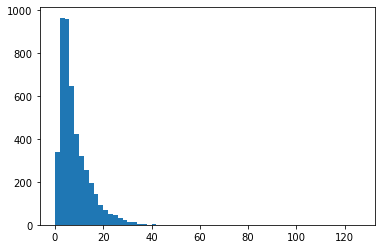

Testing Sentence Lengths: 


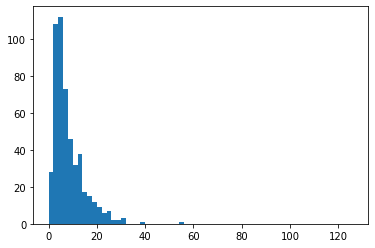

In [59]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in data_dialect.train[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in data_dialect.test[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

In [60]:
max_len = 32


In [61]:
print("Truncated training sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in data_dialect.test[DATA_COLUMN].to_list()]))

print("Truncated testing sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in data_dialect.test[DATA_COLUMN].to_list()]))

Truncated training sequences:  2
Truncated testing sequences:  2


In [62]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
        super(ClassificationDataset).__init__()
        """
        Args:
        text (List[str]): List of the training text
        target (List[str]): List of the training labels
        tokenizer_name (str): The tokenizer name (same as model_name).
        max_len (int): Maximum sentence length
        label_map (Dict[str,int]): A dictionary that maps the class labels to integer
        """
        self.text = text
        self.target = target
        self.tokenizer_name = model_name
        self.tokenizer = AutoTokenizer.from_pretrained(model_name, 
                                                       do_lower_case=False, 
                                                       do_basic_tokenize=True,
                                                       never_split=NEVER_SPLIT_TOKENS
)
        self.max_len = max_len
        self.label_map = label_map
      

    def __len__(self):
        return len(self.text)

    def __getitem__(self,item):
        text = str(self.text[item])
        text = " ".join(text.split())
        
        inputs = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True
        )      
        return InputFeatures(**inputs,label=self.label_map[self.target[item]])

In [63]:
label_map = { v:index for index, v in enumerate(data_dialect.label_list) }
print(label_map)

train_dataset = ClassificationDataset(
    data_dialect.train[DATA_COLUMN].to_list(),
    data_dialect.train[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )
test_dataset = ClassificationDataset(
    data_dialect.test[DATA_COLUMN].to_list(),
    data_dialect.test[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )

{0: 0, 1: 1}


In [64]:
print(next(iter(train_dataset)))


InputFeatures(input_ids=[2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], label=0)


In [65]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, return_dict=True, num_labels=len(label_map))

In [66]:
def compute_metrics(p): #p should be of type EvalPrediction
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)
    #print(classification_report(p.label_ids,preds))
    #print(confusion_matrix(p.label_ids,preds))
    macro_f1 = f1_score(p.label_ids,preds,average='macro')
    #macro_precision = precision_score(p.label_ids,preds,average='macro')
    #macro_recall = recall_score(p.label_ids,preds,average='macro')
    acc = accuracy_score(p.label_ids,preds)
    return {       
      'macro_f1' : macro_f1,
      'accuracy': acc
    }

In [67]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic=False # turned from True to False
    torch.backends.cudnn.benchmark = False

In [68]:
training_args = TrainingArguments( 
    output_dir= "./train",    
    adam_epsilon = 1e-8,
    learning_rate = 2e-5,
    fp16 = False, # enable this when using V100 or T4 GPU
    per_device_train_batch_size = 16, # up to 64 on 16GB with max len of 128
    per_device_eval_batch_size = 128,
    gradient_accumulation_steps = 2, # use this to scale batch size without needing more memory
    num_train_epochs= 1,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    load_best_model_at_end = True, # this allows to automatically get the best model at the end based on whatever metric we want
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 25
  )

set_seed(training_args.seed)

In [69]:
trainer = Trainer(
    model = model_init(),
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

In [70]:
trainer.train()


F:\Conda\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 4601
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 2
  Total optimization steps = 144
  Number of trainable parameters = 135194882


Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,0.080674,0.943363,0.976562


***** Running Evaluation *****
  Num examples = 512
  Batch size = 128
Saving model checkpoint to ./train\checkpoint-144
Configuration saved in ./train\checkpoint-144\config.json
Model weights saved in ./train\checkpoint-144\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./train\checkpoint-144 (score: 0.9433628318584071).


TrainOutput(global_step=144, training_loss=0.1207813024520874, metrics={'train_runtime': 87.7734, 'train_samples_per_second': 52.419, 'train_steps_per_second': 1.641, 'total_flos': 75660872856960.0, 'train_loss': 0.1207813024520874, 'epoch': 1.0})

In [71]:
label_map = {"label1": 0, "label2": 1}
inv_label_map = {v: k for k, v in label_map.items()}

trainer.model.config.label2id = label_map
trainer.model.config.id2label = inv_label_map

trainer.save_model("output_dir")
train_dataset.tokenizer.save_pretrained("output_dir")


Saving model checkpoint to output_dir
Configuration saved in output_dir\config.json
Model weights saved in output_dir\pytorch_model.bin
tokenizer config file saved in output_dir\tokenizer_config.json
Special tokens file saved in output_dir\special_tokens_map.json


('output_dir\\tokenizer_config.json',
 'output_dir\\special_tokens_map.json',
 'output_dir\\vocab.txt',
 'output_dir\\added_tokens.json',
 'output_dir\\tokenizer.json')

In [72]:
import pickle

# Save model
with open("output_dir.pkl", "wb") as f:
    pickle.dump(trainer.model, f)

# Save tokenizer
with open("output_dir.pkl", "wb") as f:
    pickle.dump(train_dataset.tokenizer, f)


In [73]:
import pickle

# Load model
with open("output_dir.pkl", "rb") as f:
    model = pickle.load(f)

# Load tokenizer
with open("output_dir.pkl", "rb") as f:
    tokenizer = pickle.load(f)


In [74]:
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

from transformers import pipeline
import more_itertools
from typing import List
from tqdm import tqdm


In [75]:
#!pip install more_itertools

In [76]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [77]:
DATA_COLUMN = "sms"
LABEL_COLUMN = "label"

In [78]:
df.columns = [DATA_COLUMN, LABEL_COLUMN]
print(df[LABEL_COLUMN].value_counts())

label_list_dialect = list(df[LABEL_COLUMN].unique())
print(label_list_dialect)

train_dialect, test_dialect = train_test_split(df, test_size=0.1, random_state=42, stratify=df[LABEL_COLUMN] )

print("Training length: ", len(train_dialect))
print("Testing length: ", len(test_dialect))

data_dialect = CustomDataset("Dialect", train_dialect, test_dialect, label_list_dialect)

0    4483
1     630
Name: label, dtype: int64
[0, 1]
Training length:  4601
Testing length:  512


In [79]:

label_map = { v:index for index, v in enumerate(data_dialect.label_list) }
print(label_map)
inv_label_map = { v:k for k, v in label_map.items()}


{0: 0, 1: 1}


In [80]:
pred_df = pd.DataFrame([])
pred_df[DATA_COLUMN] = data_dialect.test[DATA_COLUMN].copy()
# max_len = 32

In [81]:
pipe = pipeline("text-classification", model="output_dir", device=0, return_all_scores =False) # max_length=max_len, truncation=True
preds = []
for s in tqdm(pred_df[DATA_COLUMN].to_list()):
    preds.append(pipe(s)[0]["label"])

loading configuration file output_dir\config.json
Model config BertConfig {
  "_name_or_path": "output_dir",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "label1",
    "1": "label2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "label1": 0,
    "label2": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 64000
}

loading configuration file output_dir\config.json
Model config BertConfig {
  "_name_or_path": "output_dir",
  "architectures": 

In [82]:
pred_df["Prediction"] = preds
pred_df

,sms,Prediction
951,اعرف حول,label1
4763,ليل الحب,label1
5121,قال لول حقيق لسرط اب,label1
2730,نداء عاجل اتصل ٠٩٠٦٦٦١٢٦٦١ ٤ ١٠٠٠ ١٥٠ ٢٨ 7٤,label2
1208,تحتاج ذراع قو,label1
...,...,...
1295,,label1
2460,يعن كلام يقول اجعل التح,label1
1408,يجب,label1
5557,هند لطيف ٤ ٢ ٢ ٤ ضحك قريب الحب,label1


In [83]:
pred_df['Prediction'] = pred_df['Prediction'].replace({"label1": 0, "label2": 1})


In [84]:
pred_df

,sms,Prediction
951,اعرف حول,0
4763,ليل الحب,0
5121,قال لول حقيق لسرط اب,0
2730,نداء عاجل اتصل ٠٩٠٦٦٦١٢٦٦١ ٤ ١٠٠٠ ١٥٠ ٢٨ 7٤,1
1208,تحتاج ذراع قو,0
...,...,...
1295,,0
2460,يعن كلام يقول اجعل التح,0
1408,يجب,0
5557,هند لطيف ٤ ٢ ٢ ٤ ضحك قريب الحب,0


In [88]:
import os
...
if not os.path.exists('Models'):
    os.mkdir('Models')
plt.savefig("Models/"+modelname+'_results.png', dpi=150, bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

Test accuracy = 0.98046875
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       449
           1       0.95      0.89      0.92        63

    accuracy                           0.98       512
   macro avg       0.97      0.94      0.95       512
weighted avg       0.98      0.98      0.98       512



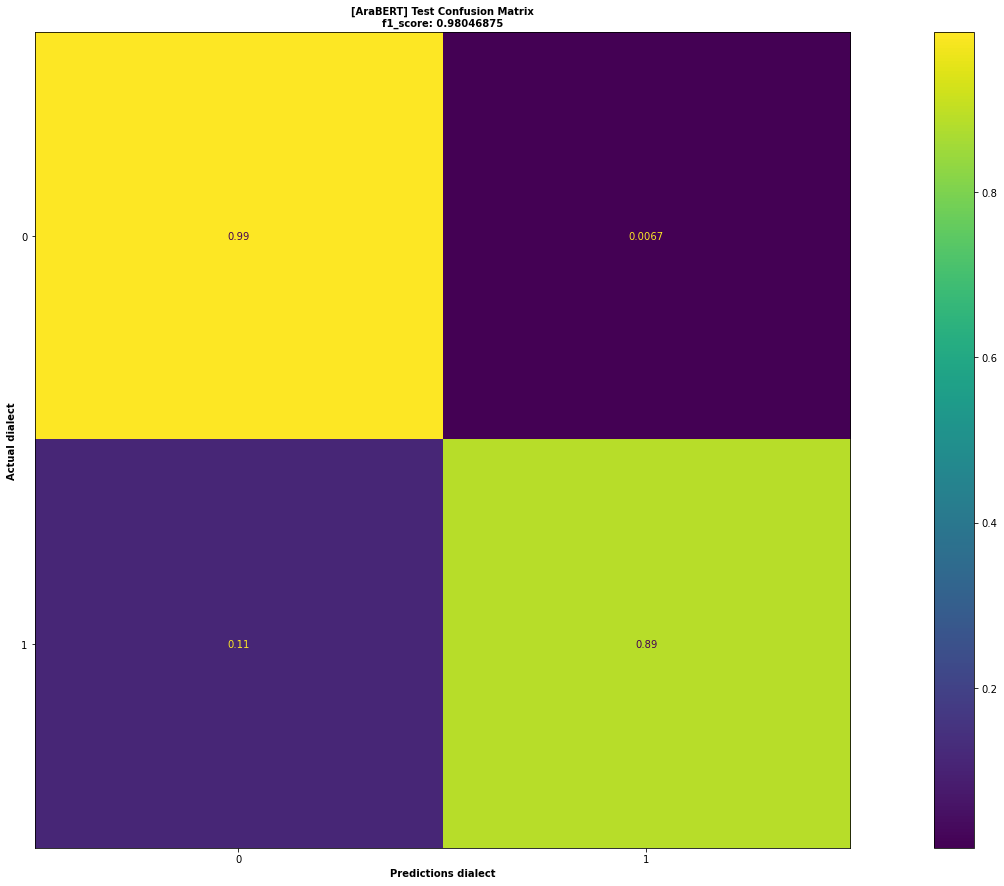

In [86]:
y_test = data_dialect.test[LABEL_COLUMN]
y_test_pred = pred_df["Prediction"]
modelname = "AraBERT"

# Check test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(y_test, y_test_pred))

fig, ax = plt.subplots(1,1,figsize= (30,15))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred ,normalize ='true' ), display_labels=label_list_dialect).plot(ax=ax);
ax.set_title(f"[{modelname}] Test Confusion Matrix\nf1_score: {f1_score(y_test, y_test_pred, average='micro')}",font ={'weight' : 'bold'})
ax.set_xlabel('Predictions dialect',font ={'weight' : 'bold'})
ax.set_ylabel('Actual dialect',font ={'weight' : 'bold'})
plt.savefig("Models/"+modelname+'_results.png', dpi=150, bbox_inches='tight')
plt.show()

In [87]:
from sklearn.metrics import matthews_corrcoef

# load your predicted and actual labels
# calculate the Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_test_pred)

# print the MCC score
print("Matthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 0.907588579032124
